<a href="https://colab.research.google.com/github/MoonlightO2/100-Days-of-DataScience/blob/main/Stroke_Data_Analysis_%26_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stroke Data Analysis & Prediction**

### **Understanding the Dataset**

| Column            | Description                                |
| ----------------- | ------------------------------------------ |
| ID                | Unique identifier for a person             |
| Gender            | Male or Female                             |
| Age               | Age in years                               |
| Hypertension      | 0 = No, 1 = Yes                            |
| Heart Disease     | 0 = No, 1 = Yes                            |
| Ever Married      | Yes or No                                  |
| Work Type         | Type of employment                         |
| Residence Type    | Urban or Rural                             |
| Avg Glucose Level | Average blood glucose level                |
| BMI               | Body Mass Index                            |
| Smoking Status    | Smoking habits                             |
| Stroke            | Target Variable: 0 = No Stroke, 1 = Stroke |

***Dataset***: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [23]:
# @title Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
# @title Load file
file1 = '/content/drive/MyDrive/Projects/2025-06-27/Stroke data.csv'
file2 = '/content/drive/MyDrive/Projects/2025-06-27/Stroke new data.csv'

In [25]:
# @title Load data
data = pd.read_csv(file1)

print(f"Shape: {data.shape}\n")

print(f"Column names: {data.columns.tolist()}\n\n")

data.head()

Shape: (5110, 12)

Column names: ['ID', 'Gender', 'Age', 'Hypertension', 'Heart Disease', 'Ever Married', 'Work Type', 'Residence Type', 'Avg Glucose Level', 'BMI', 'Smoking Status', 'Stroke']




,ID,Gender,Age,Hypertension,Heart Disease,Ever Married,Work Type,Residence Type,Avg Glucose Level,BMI,Smoking Status,Stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,Formerly Smoked,1
1,51676,Female,61.0,0,0,Yes,Self-Employed,Rural,202.21,NaN,Never Smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,Never Smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,Smokes,1
4,1665,Female,79.0,1,0,Yes,Self-Employed,Rural,174.12,24.0,Never Smoked,1


In [26]:
# @title Data Cleaning & Preprocessing
# Clean string data: replace underscores with spaces, title case
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].str.replace('_', ' ', regex=False).str.title()

# Drop ID column (not useful for prediction)
data.drop('ID', axis=1, inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

# Handle missing values (optional)
data.fillna(data.mean(numeric_only=True), inplace=True)

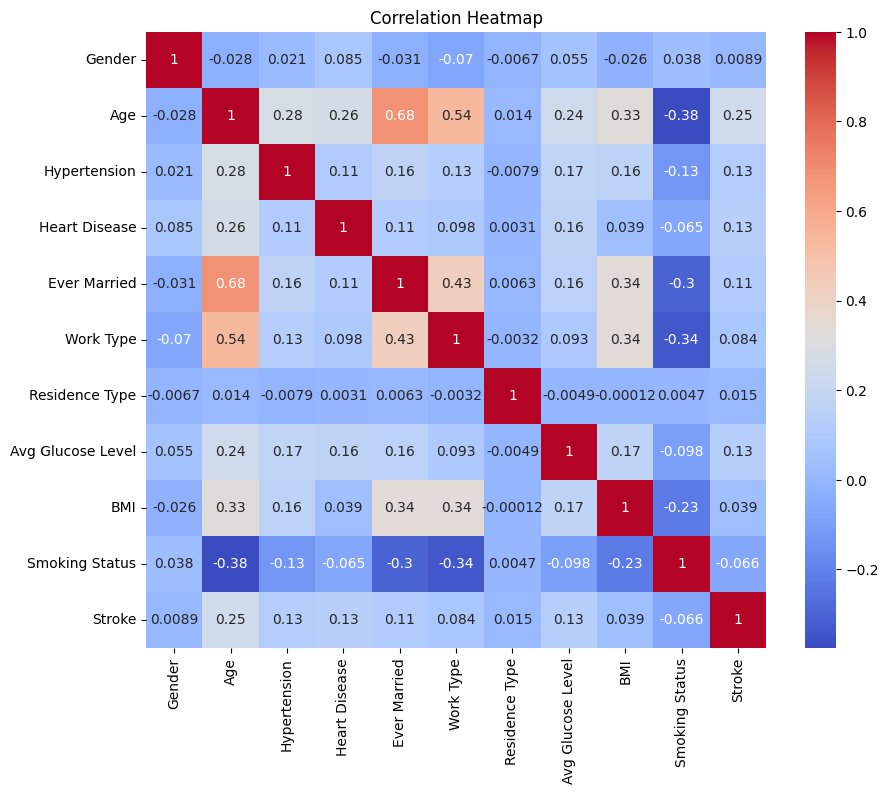

In [27]:
# @title Exploratory Data Analysis (EDA) - Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

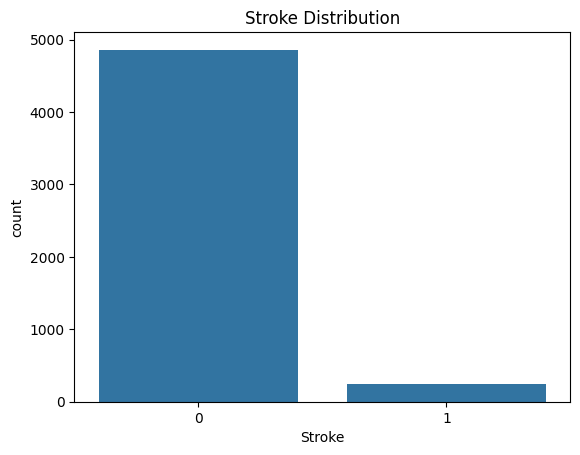

In [28]:
# @title Exploratory Data Analysis (EDA) - Stroke distribution
sns.countplot(x='Stroke', data=data)
plt.title('Stroke Distribution')
plt.show()

In [29]:
# @title Splitting & Scaling - Features and target
X = data.drop('Stroke', axis=1)
y = data['Stroke']

In [30]:
# @title Splitting & Scaling - Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [31]:
# @title Splitting & Scaling - Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# @title Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# @title Model Training - Predict
y_pred = model.predict(X_test_scaled)

In [34]:
# @title Model Training - Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.949119373776908

Confusion Matrix:
 [[970   2]
 [ 50   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022



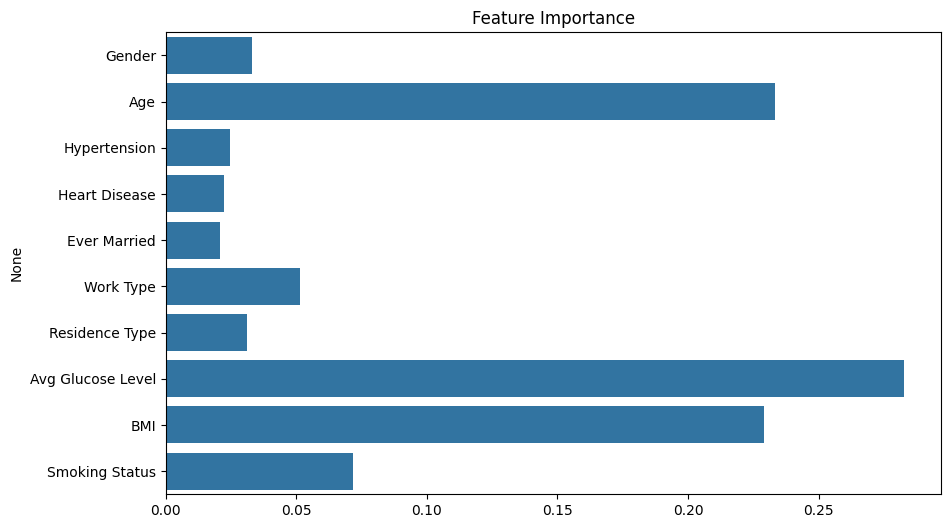

In [35]:
# @title Feature Importance - Plot feature importances
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.show()

In [36]:
# @title Prediction Function (for New Data)
def predict_stroke(new_data, model, scaler):
    processed_data = pd.DataFrame([new_data])
    for col in processed_data.select_dtypes(include='object').columns:
        processed_data[col] = le.fit_transform(processed_data[col].str.title())

    processed_data_scaled = scaler.transform(processed_data)
    prediction = model.predict(processed_data_scaled)
    return 'Stroke' if prediction[0] == 1 else 'No Stroke'

In [37]:
# @title Example input:
sample = {
    'Gender': 'Female',
    'Age': 55,
    'Hypertension': 1,
    'Heart Disease': 0,
    'Ever Married': 'Yes',
    'Work Type': 'Private',
    'Residence Type': 'Urban',
    'Avg Glucose Level': 200.5,
    'BMI': 31.5,
    'Smoking Status': 'Never Smoked'
}

print(predict_stroke(sample, model, scaler))

No Stroke


In [38]:
import os

def get_user_input():
    print("Please enter the following details:")

    user_data = {
        'Gender': input("Gender (Male/Female): ").strip().title(),
        'Age': float(input("Age (e.g., 45): ").strip()),
        'Hypertension': int(input("Hypertension (0 = No, 1 = Yes): ").strip()),
        'Heart Disease': int(input("Heart Disease (0 = No, 1 = Yes): ").strip()),
        'Ever Married': input("Ever Married (Yes/No): ").strip().title(),
        'Work Type': input("Work Type (e.g., Private, Self Employed, Govt Job): ").strip().title(),
        'Residence Type': input("Residence Type (Urban/Rural): ").strip().title(),
        'Avg Glucose Level': float(input("Average Glucose Level (e.g., 100.5): ").strip()),
        'BMI': float(input("BMI (e.g., 25.3): ").strip()),
        'Smoking Status': input("Smoking Status (e.g., Smokes, Never Smoked, Formerly Smoked): ").strip().title()
    }
    return user_data

def predict_stroke_from_input(save_path='predictions.csv'):
    user_data = get_user_input()
    user_df = pd.DataFrame([user_data])

    # Encode categorical columns
    for col in user_df.select_dtypes(include='object').columns:
        user_df[col] = le.fit_transform(user_df[col])

    # Scale the data
    user_scaled = scaler.transform(user_df)

    # Predict
    prediction = model.predict(user_scaled)[0]
    probability = model.predict_proba(user_scaled)[0][1]

    # Add prediction to data
    user_data['Prediction'] = 'Stroke' if prediction == 1 else 'No Stroke'
    user_data['Probability'] = round(probability, 4)

    print("\nPrediction Result:")
    print(f"Stroke Risk: {user_data['Prediction']}")
    print(f"Probability of Stroke: {user_data['Probability']}")

    # Save to CSV
    file_exists = os.path.isfile(save_path)
    save_df = pd.DataFrame([user_data])
    save_df.to_csv(file2, mode='a', index=False, header=not file_exists)
    print(f"\nPrediction saved!")

# Run the prediction + save system
predict_stroke_from_input()

Please enter the following details:
Gender (Male/Female): Female
Age (e.g., 45): 42
Hypertension (0 = No, 1 = Yes): 0
Heart Disease (0 = No, 1 = Yes): 0
Ever Married (Yes/No): Yes
Work Type (e.g., Private, Self Employed, Govt Job): E
Residence Type (Urban/Rural): Urban
Average Glucose Level (e.g., 100.5): 140
BMI (e.g., 25.3): 25
Smoking Status (e.g., Smokes, Never Smoked, Formerly Smoked): Never Smoked

Prediction Result:
Stroke Risk: No Stroke
Probability of Stroke: 0.01

Prediction saved!


# Optional Add-ons
* Use `XGBoost` or `LogisticRegressionCV` for better control.
* Save the model using `joblib` or `pickle`.
* Create a web app using **Streamlit** or **Flask**.